In [1]:
# init cell
%matplotlib inline

# Debug SVM not converging

## SVM

SVM.py:63: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  labels_formatted = train_labels.as_matrix(columns=train_labels.columns[1:])


Fitting clf
[LibLinear]Getting clf predictions
Accuracy: 0.207875


,0,1,2,3,4,5,6,7,8,9,micro avg,macro avg,weighted avg
f1-score,0.297297,0.427603,0.141224,0.169427,0.112593,0.071616,0.155653,0.193827,0.121622,0.157783,0.207875,0.184864,0.187674
precision,0.245810,0.322309,0.147679,0.177570,0.125206,0.102244,0.180272,0.197236,0.138037,0.191379,0.207875,0.182774,0.184681
recall,0.376068,0.635071,0.135309,0.161998,0.102288,0.055108,0.136951,0.190534,0.108696,0.134220,0.207875,0.203624,0.207875
support,819.000000,844.000000,776.000000,821.000000,743.000000,744.000000,774.000000,824.000000,828.000000,827.000000,8000.000000,8000.000000,8000.000000


Confusion matrix, without normalization
Normalized confusion matrix


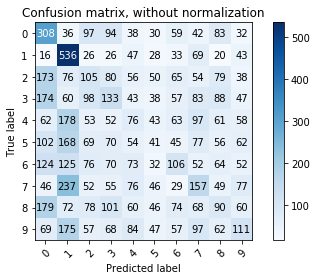

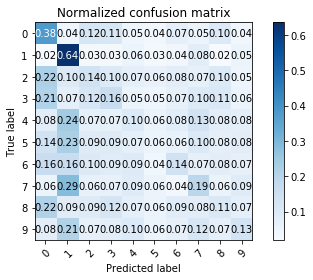

In [5]:
# SVM
%run -i SVM.py

# LinearSVM00
svm, ypred, testY, testX = train_clf(train_images, LinearSVC(verbose=2, max_iter=1000))

ypred = svm.predict(testX)
report = classification_report(testY, ypred, output_dict=True)
display(pd.DataFrame(report))

plot_confusion_matrix(testY, ypred, svm.classes_, normalize=True)
plt.show()

SVM.py:63: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  labels_formatted = train_labels.as_matrix(columns=train_labels.columns[1:])


Fitting clf
Getting clf predictions
Accuracy: 0.212875


,0,1,2,3,4,5,6,7,8,9,micro avg,macro avg,weighted avg
f1-score,0.314938,0.442331,0.140490,0.184026,0.129464,0.070588,0.149341,0.173043,0.141061,0.129889,0.212875,0.187517,0.191158
precision,0.251138,0.339210,0.149718,0.195387,0.152632,0.102362,0.174061,0.172941,0.158556,0.154930,0.212875,0.185093,0.187406
recall,0.422194,0.635535,0.132335,0.173913,0.112403,0.053867,0.130769,0.173145,0.127044,0.111817,0.212875,0.207302,0.212875
support,784.000000,878.000000,801.000000,828.000000,774.000000,724.000000,780.000000,849.000000,795.000000,787.000000,8000.000000,8000.000000,8000.000000


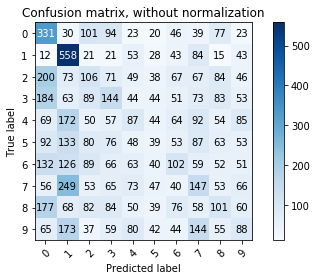

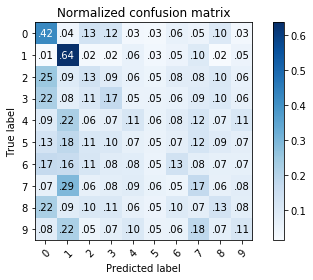

In [2]:
# SVM without verbose: allegedly faster
%run -i SVM.py

# LinearSVM00
svm, ypred, testY, testX = train_clf(train_images, LinearSVC(max_iter=1000))

ypred = svm.predict(testX)
report = classification_report(testY, ypred, output_dict=True)
display(pd.DataFrame(report))

plot_confusion_matrix(testY, ypred, svm.classes_, normalize=True)
plt.show()

## SGDClassifier SVM

SVM.py:63: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  labels_formatted = train_labels.as_matrix(columns=train_labels.columns[1:])


Fitting clf
Getting clf predictions
Accuracy: 0.1855


,0,1,2,3,4,5,6,7,8,9,micro avg,macro avg,weighted avg
f1-score,0.248791,0.474771,0.161290,0.153147,0.194416,0.078925,0.093750,0.142555,0.11658,0.073050,0.1855,0.173728,0.178350
precision,0.267857,0.481395,0.142463,0.161423,0.135838,0.104444,0.114723,0.179078,0.11509,0.145669,0.1855,0.184798,0.188754
recall,0.232258,0.468326,0.185851,0.145679,0.341818,0.063428,0.079260,0.118406,0.11811,0.048748,0.1855,0.180188,0.185500
support,775.000000,884.000000,834.000000,810.000000,825.000000,741.000000,757.000000,853.000000,762.00000,759.000000,8000.0000,8000.000000,8000.000000


<Figure size 432x288 with 0 Axes>

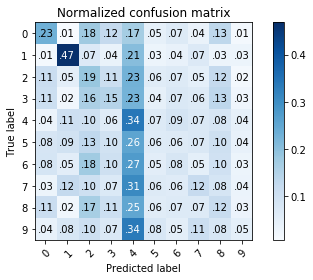

In [3]:
# SGD SVM?
%run -i SVM.py

# LinearSVM thru SGDClf
svm, ypred, testY, testX = train_clf(train_images,
                      SGDClassifier(max_iter=1000, tol=1e-5, n_jobs=-1))

ypred = svm.predict(testX)
report = classification_report(testY, ypred, output_dict=True)
display(pd.DataFrame(report))

plot_confusion_matrix(testY, ypred, svm.classes_, normalize=True)
plt.show()

# Mods

## Add bias

In [2]:
%run -i SVM.py

In [25]:
train_labels = pd.read_csv(pj('data/input', 'train_labels.csv'))


labels_formatted = train_labels.as_matrix(columns=train_labels.columns[1:])

X, testX, Y, testY = train_test_split(train_images, labels_formatted, test_size = 0.2)

nsamples, nX, nY = np.shape(X)
X = np.reshape(X, (nsamples, nX*nY))
Y = np.reshape(Y, (np.shape(Y)[0], ))

print(X.shape)
tmp = [np.append(x, 1) for x in X]
X = np.array(tmp)
print(X.shape)

SVM.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import pandas as pd


(32000, 4096)
(32000, 4097)


## Normalize

In [34]:
from sklearn.preprocessing import normalize
from scipy import stats

train_images = pd.read_pickle(pj('data/input', 'train_rect_1.pkl'))
train_labels = pd.read_csv(pj('data/input', 'train_labels.csv'))

# Remove column labels. Shape (N, 1)
labels_formatted = train_labels.as_matrix(columns=train_labels.columns[1:])

# a, b, c = np.shape(train_images)
# train_images = np.reshape(train_images, (a, b*c))
print(np.shape(train_images))

# Reshape data to 2d arrays
N, nX, nY = np.shape(train_images)
train_images = np.reshape(train_images, (N, nX*nY))


X, testX, Y, testY = train_test_split(train_images, labels_formatted, test_size = 0.2)

print(np.shape(labels_formatted))
print(np.shape(Y))

Xn = normalize(X)
print(X.mean(), X.std())
print(Xn.mean(), Xn.std())

SVM.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from sklearn.model_selection import train_test_split


(40000, 64, 64)
(40000, 1)
(32000, 1)
15.239522323608398 60.44696147754995
0.003788490490307113 0.015158758682849098


## Get rid of as_matrix warning

No time, leave it.

In [52]:
%run -i SVM.py

train_labels = pd.read_csv(pj('data/input', 'train_labels.csv'))

print(train_labels.shape)

old = train_labels.as_matrix(columns=train_labels.columns[1:])
print(old.shape)

new = train_labels['Category'].values
print(new.shape)

(40000, 2)
(40000, 1)
(40000,)


SVM.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # from sklearn.metrics import confusion_matrix


array([9, 9, 0, ..., 1, 3, 6])